# **Preprocessing & Descriptive Analysis of Dataset**
This notebook implements the preprocessing stage of the methodology.

The objective is to clean, transform, and prepare the dataset for neural network training.

This includes data loading, missing value handling, outlier treatment, exploratory analysis, correlation assessment, and feature scaling.



### **Import Libraries**

Required libraries for data manipulation, visualization, outlier treatment, and feature scaling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

### **Data Loading**
The Polish Companies Bankruptcy dataset (1-year horizon) is loaded from ARFF format and converted into a pandas DataFrame.

Each observation represents a firm classified as bankrupt or non-bankrupt.

The target variable is binary (1 = bankrupt, 0 = non-bankrupt), making this a binary classification problem.

In [ ]:
# Load the dataset
data, meta = arff.loadarff("1year.arff")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Convert the target variable from bytes to integer
# (0 = non-bankrupt, 1 = bankrupt) for compatibility with neural network training
df["class"] = (
    df["class"]
    .astype(str)
    .str.replace("b'", "", regex=False)
    .str.replace("'", "", regex=False)
    .astype(int)
)

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


### **Renaming of Attributes to their Respective Financial Ratios**

Original attributes are labeled Attr1–Attr64.

For interpretability, we rename them using their financial ratio definitions.

In [ ]:
attr_rename = {
    "Attr1": "ROA_net_profit_total_assets",
    "Attr2": "Total_liabilities_total_assets",
    "Attr3": "Working_capital_total_assets",
    "Attr4": "Current_assets_short_term_liabilities",
    "Attr5": "Cash_flow_adequacy_ratio",
    "Attr6": "Retained_earnings_total_assets",
    "Attr7": "EBIT_total_assets",
    "Attr8": "Equity_book_value_total_liabilities",
    "Attr9": "Sales_total_assets",
    "Attr10": "Equity_total_assets",
    "Attr11": "Gross_profit_extra_items_fin_exp_total_assets",
    "Attr12": "Gross_profit_short_term_liabilities",
    "Attr13": "Gross_profit_depreciation_sales",
    "Attr14": "Gross_profit_interest_total_assets",
    "Attr15": "Liabilities_turnover_days",
    "Attr16": "Gross_profit_depreciation_total_liabilities",
    "Attr17": "Total_assets_total_liabilities",
    "Attr18": "Gross_profit_total_assets",
    "Attr19": "Gross_profit_sales",
    "Attr20": "Inventory_turnover_days",
    "Attr21": "Sales_growth_rate",
    "Attr22": "Operating_profit_total_assets",
    "Attr23": "Net_profit_sales",
    "Attr24": "Gross_profit_3y_avg_total_assets",
    "Attr25": "Equity_minus_share_capital_total_assets",
    "Attr26": "Cash_flow_total_liabilities",
    "Attr27": "Operating_profit_financial_expenses",
    "Attr28": "Working_capital_fixed_assets",
    "Attr29": "Log_total_assets",
    "Attr30": "Liabilities_excl_cash_sales",
    "Attr31": "Gross_profit_interest_sales",
    "Attr32": "Current_liabilities_turnover_days",
    "Attr33": "Operating_expenses_short_term_liabilities",
    "Attr34": "Operating_expenses_total_liabilities",
    "Attr35": "Profit_on_sales_total_assets",
    "Attr36": "Sales_total_assets_alt",
    "Attr37": "Quick_assets_long_term_liabilities",
    "Attr38": "Constant_capital_total_assets",
    "Attr39": "Profit_on_sales_sales",
    "Attr40": "Cash_ratio",
    "Attr41": "Debt_repayment_period",
    "Attr42": "Operating_profit_sales",
    "Attr43": "Receivables_inventory_turnover_days",
    "Attr44": "Receivables_turnover_days",
    "Attr45": "Net_profit_inventory",
    "Attr46": "Quick_ratio",
    "Attr47": "Inventory_turnover_days_COGS",
    "Attr48": "EBITDA_total_assets",
    "Attr49": "EBITDA_sales",
    "Attr50": "Current_assets_total_liabilities",
    "Attr51": "Short_term_liabilities_total_assets",
    "Attr52": "Short_term_liabilities_turnover_days",
    "Attr53": "Equity_fixed_assets",
    "Attr54": "Constant_capital_fixed_assets",
    "Attr55": "Working_capital",
    "Attr56": "Gross_margin",
    "Attr57": "Liquidity_efficiency_ratio",
    "Attr58": "Total_costs_total_sales",
    "Attr59": "Long_term_liabilities_equity",
    "Attr60": "Sales_inventory",
    "Attr61": "Sales_receivables",
    "Attr62": "Short_term_liabilities_sales_days",
    "Attr63": "Sales_short_term_liabilities",
    "Attr64": "Sales_fixed_assets"
}

# Check correct renaming
df = df.rename(columns=attr_rename)
df.columns[:10]

Index(['ROA_net_profit_total_assets', 'Total_liabilities_total_assets',
       'Working_capital_total_assets', 'Current_assets_short_term_liabilities',
       'Cash_flow_adequacy_ratio', 'Retained_earnings_total_assets',
       'EBIT_total_assets', 'Equity_book_value_total_liabilities',
       'Sales_total_assets', 'Equity_total_assets'],
      dtype='object')

### **Initial Dataset Inspection**

This section inspects the dataset structure, variable types, and class distribution.

Particular attention is paid to class imbalance, a common characteristic in bankruptcy datasets, which will be addressed prior to neural network training.

In [ ]:
# Dataset dimensions
print("Dataset shape (rows, columns):", df.shape)

# Data types
print("\nData types:")
print(df.dtypes.value_counts())

# No categorical values so no need for encoding

Dataset shape (rows, columns): (7027, 65)

Data types:
float64    64
int64       1
Name: count, dtype: int64


In [ ]:
# Distribution of the target variable - class imbalance check
class_counts = df["class"].value_counts()
class_perc = df["class"].value_counts(normalize=True) * 100

pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_perc.round(2)
})

,Count,Percentage
class,,
0,6756,96.14
1,271,3.86


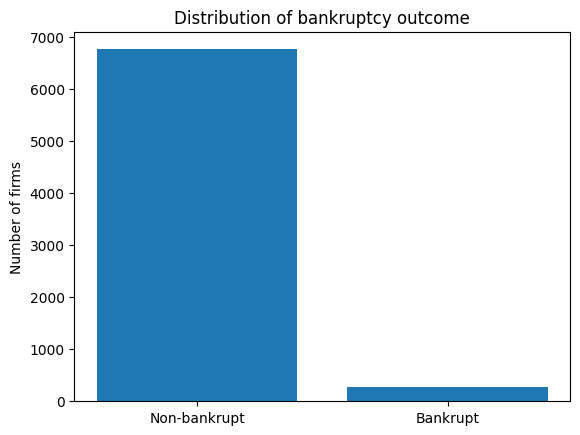

In [ ]:
# Visual representation of class imbalance
plt.figure()
plt.bar(["Non-bankrupt", "Bankrupt"], class_counts.values)
plt.ylabel("Number of firms")
plt.title("Distribution of bankruptcy outcome")
plt.show()

### **Missing Values Analysis & Imputation**

Missing values are analyzed both in absolute and relative terms.
A two-step strategy is applied:

1) Variables exceeding a predefined missingness threshold are removed.

2) Remaining missing values are imputed using the median, due to its robustness to extreme values.

In [ ]:
# Count missing values per variable
missing_count = df.isna().sum()

# Percentage of missing values per variable
missing_pct = (missing_count / len(df)) * 100

# Table with info of variables with missing values
missing_table = pd.DataFrame({
    "Missing values": missing_count,
    "Missing (%)": missing_pct.round(2)
})
missing_table = missing_table[missing_table["Missing values"] > 0]
missing_table.sort_values("Missing (%)", ascending=False)

,Missing values,Missing (%)
Quick_assets_long_term_liabilities,2740,38.99
Sales_growth_rate,1622,23.08
Operating_profit_financial_expenses,311,4.43
Sales_inventory,135,1.92
Net_profit_inventory,134,1.91
Gross_profit_3y_avg_total_assets,124,1.76
Debt_repayment_period,84,1.20
Gross_profit_extra_items_fin_exp_total_assets,39,0.56
Current_liabilities_turnover_days,38,0.54
Constant_capital_fixed_assets,34,0.48


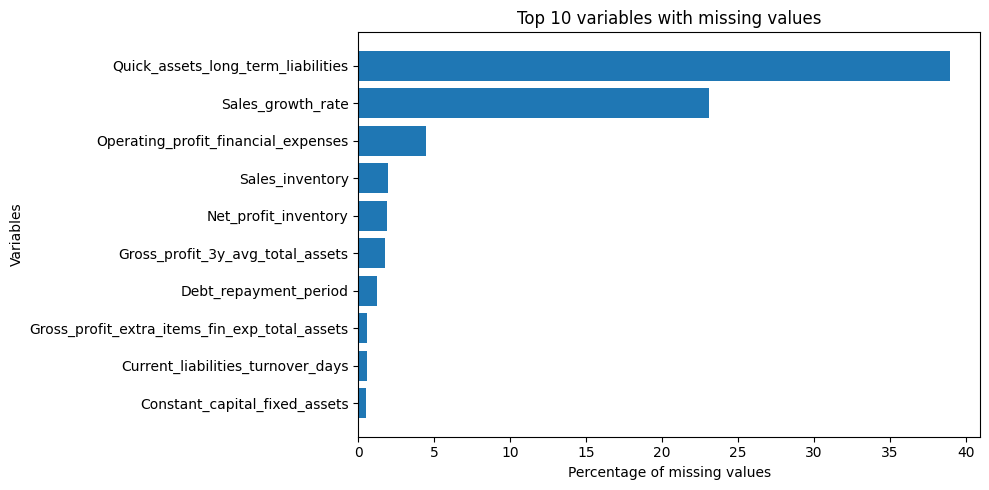

In [ ]:
# Visualization of top variables with missing values
missing_sorted = missing_table.sort_values("Missing (%)", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(missing_sorted.index, missing_sorted["Missing (%)"])

plt.xlabel("Percentage of missing values")
plt.ylabel("Variables")
plt.title("Top 10 variables with missing values")

plt.gca().invert_yaxis()   # largest on top
plt.tight_layout()
plt.show()

There are 49 variables containing missing values, with two variables exhibiting particularly high percentages.

In [ ]:
# Missing values are handled using a two-step approach:

# (i) Remove variables exceeding a predefined missingness threshold
threshold = 20

vars_to_drop = missing_table[
    missing_table["Missing (%)"] > threshold
].index.tolist()

df = df.drop(columns=vars_to_drop)

# (ii) Median imputation is applied to the remaining variables for robustness to extreme values
df_imputed = df.copy()

for col in df_imputed.columns:
    if col != "class":
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Verify that no missing values remain
df_imputed.isna().sum().sum()

np.int64(0)

### **Descriptive Statistical Analysis**

Descriptive statistics are computed to analyze dispersion and detect extreme values.

Financial ratios can exhibit heavy tails and large outliers.

In [ ]:
# Print statistical analysis of the variables of the dataset
desc_stats = df_imputed.drop(columns=["class"]).describe().T
desc_stats[["mean", "std", "min", "25%", "50%", "75%", "max"]]

,mean,std,min,25%,50%,75%,max
ROA_net_profit_total_assets,0.034677,4.564530,-2.568900e+02,0.021208,0.075802,0.16024,94.28
Total_liabilities_total_assets,0.560182,5.348941,-7.216200e+01,0.296760,0.482960,0.68017,441.50
Working_capital_total_assets,0.119995,5.274333,-4.405000e+02,0.027011,0.181275,0.36250,1.00
Current_assets_short_term_liabilities,2.624331,13.229226,0.000000e+00,1.064100,1.502000,2.45225,1017.80
Cash_flow_adequacy_ratio,-262.873758,37053.484371,-2.722100e+06,-44.430500,-5.373900,37.69500,990900.00
...,...,...,...,...,...,...,...
Sales_inventory,424.759473,25875.850416,4.700000e-05,6.013050,10.040500,19.82050,2137800.00
Sales_receivables,15.615276,261.145162,1.600000e-05,4.834250,7.033700,10.68700,21110.00
Short_term_liabilities_sales_days,4763.201955,310783.483587,0.000000e+00,43.222500,68.509000,106.33500,25016000.00
Sales_short_term_liabilities,8.114797,19.954532,1.500000e-05,3.432500,5.303200,8.32680,1042.20


### **Outlier Inspection & Transformations**

In the descriptive analysis some variables present extremes.

Outliers are identified using a strict dispersion-based rule and analyzed using boxplots.

Observations are not removed to preserve bankruptcy-related information.

Selected variables are winsorized at the 1% and 99% percentiles.

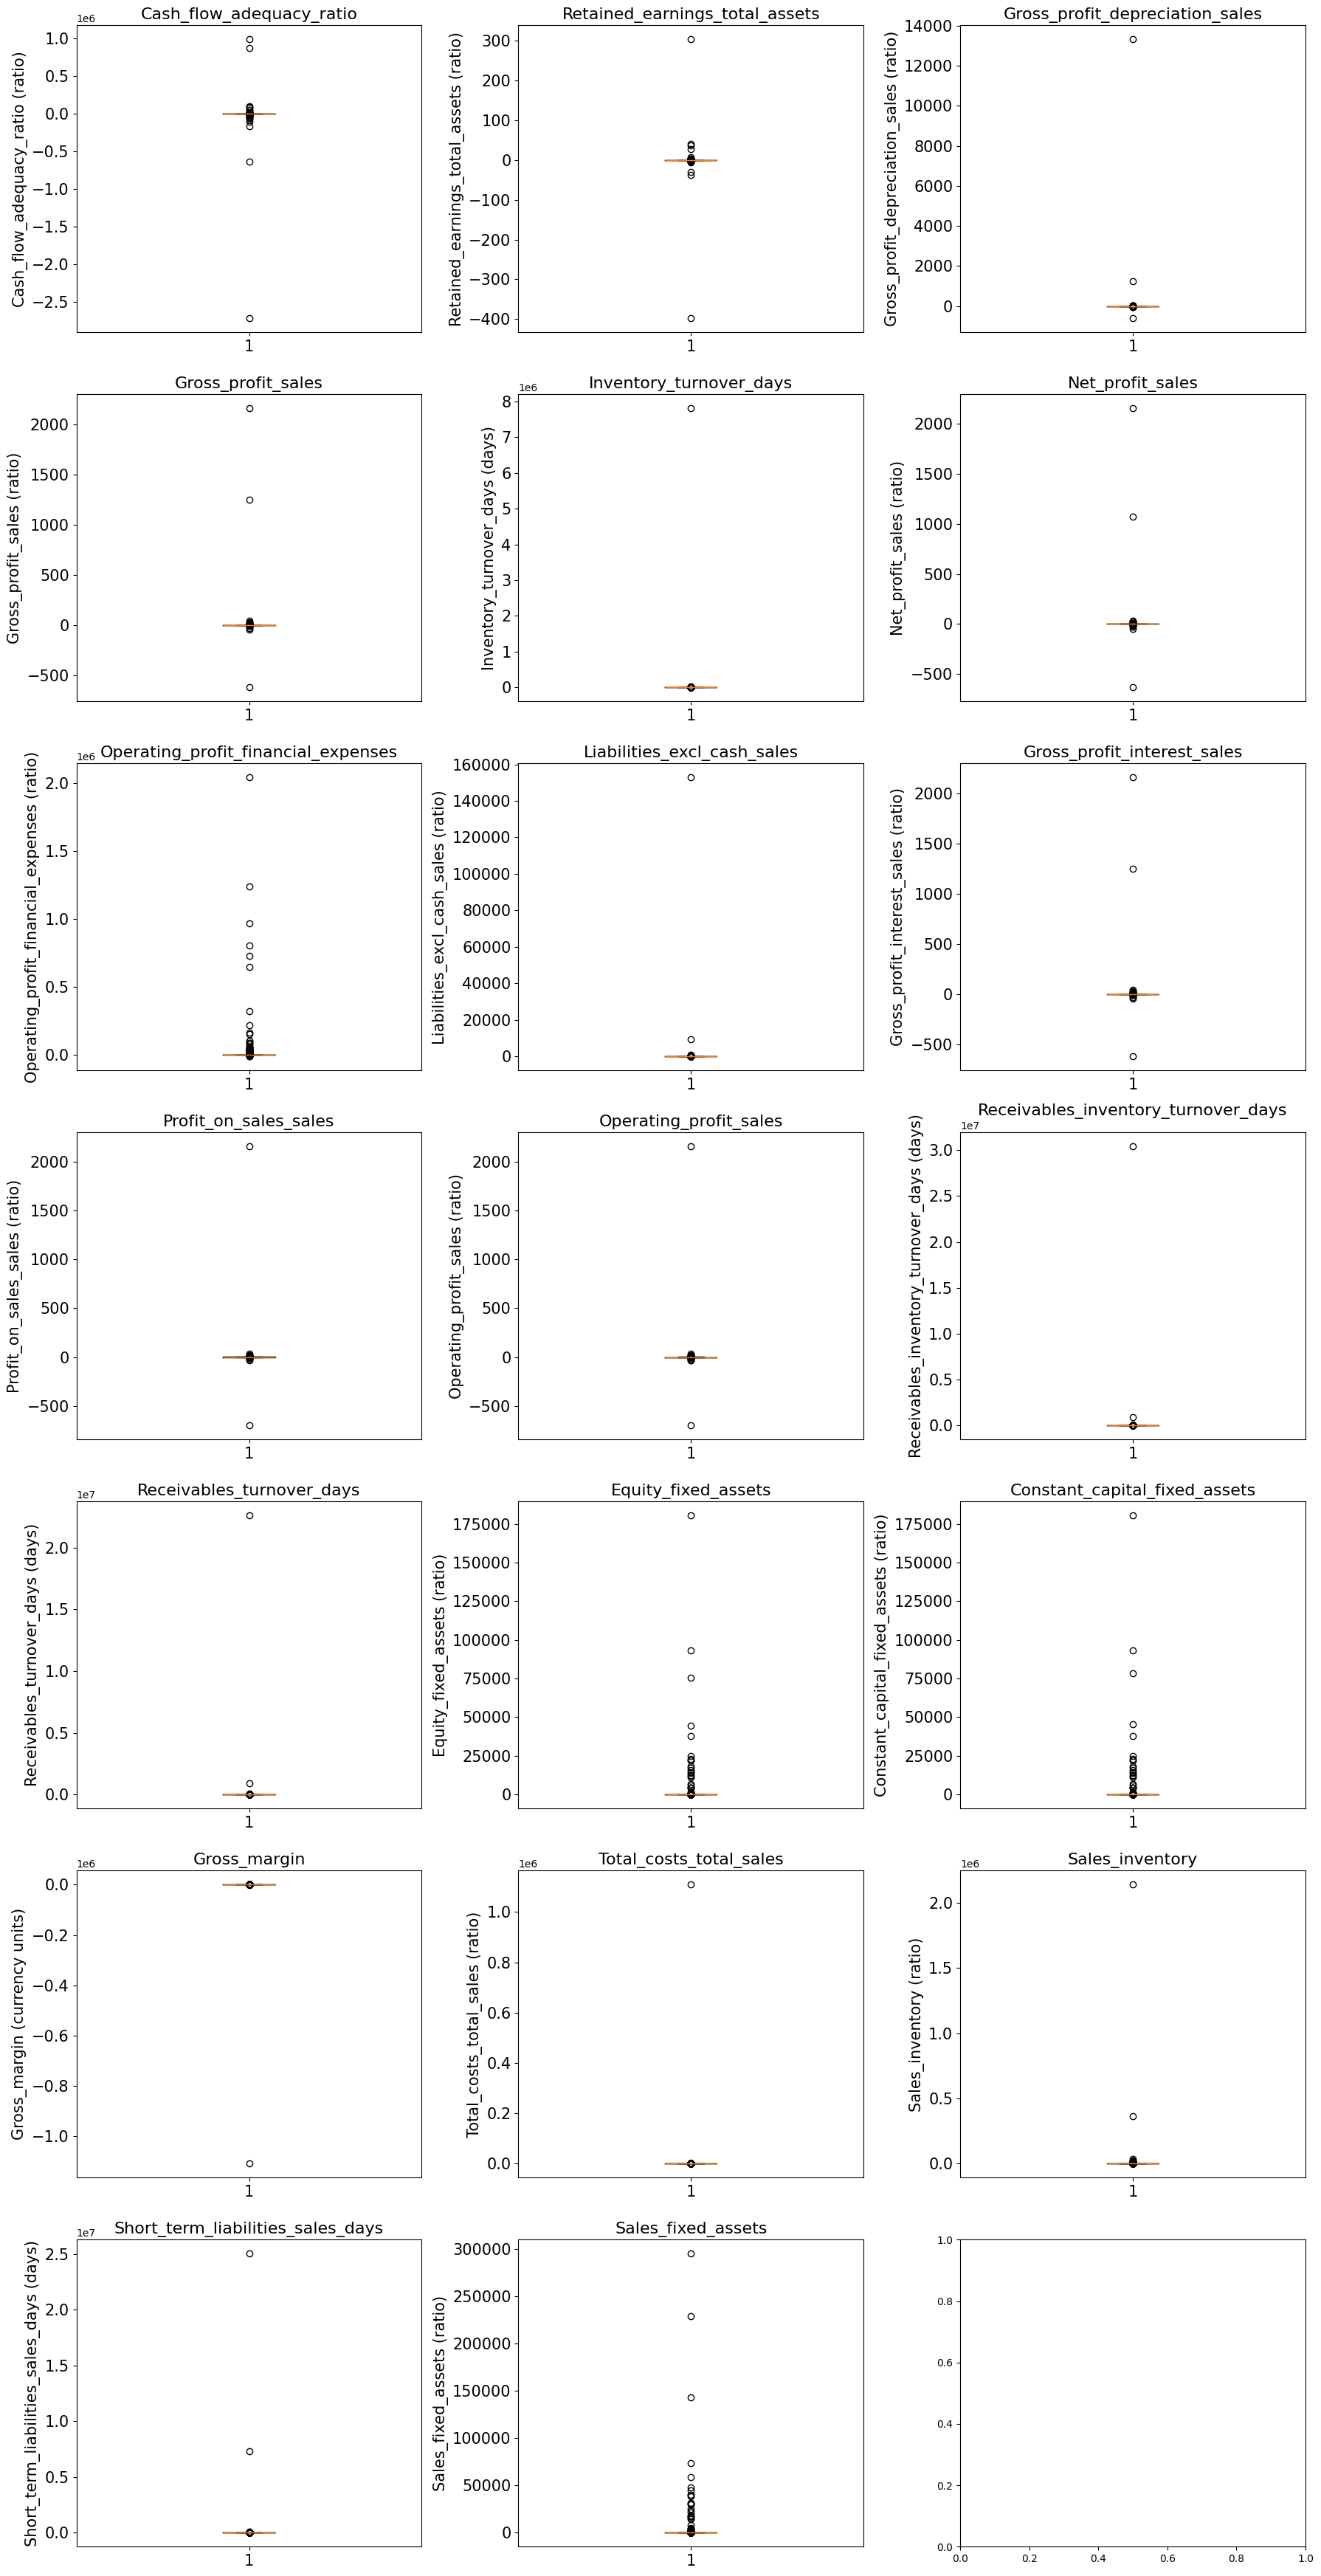

In [ ]:
import math

stats = desc_stats.copy()

# Strict rule to identify extreme dispersion relative to central values
stats["flag_strong_outlier"] = (
    (stats["max"] > 10000 * stats["75%"]) |                 # huge right tail
    (stats["std"] > 10000 * (stats["50%"].abs() + 1e-6))    # huge dispersion
)

vars_out = stats[stats["flag_strong_outlier"]].index.tolist()

# Units dictionary (for the y axis)
units = {
    # Monetary
    "Gross_margin": "currency units",

    # Days
    "Receivables_inventory_turnover_days": "days",
    "Inventory_turnover_days": "days",
    "Receivables_turnover_days": "days",
    "Short_term_liabilities_sales_days": "days",

    # Ratios
    "Retained_earnings_total_assets": "ratio",
    "Operating_profit_financial_expenses": "ratio",
    "Liabilities_excl_cash_sales": "ratio",
    "Total_costs_total_sales": "ratio",
    "Sales_inventory": "ratio",
    "Cash_flow_adequacy_ratio": "ratio",
    "Gross_profit_depreciation_sales": "ratio",
    "Gross_profit_sales": "ratio",
    "Net_profit_sales": "ratio",
    "Gross_profit_interest_sales": "ratio",
    "Profit_on_sales_sales": "ratio",
    "Operating_profit_sales": "ratio",
    "Equity_fixed_assets": "ratio",
    "Constant_capital_fixed_assets": "ratio",
    "Sales_fixed_assets": "ratio",
}

def y_label(var):
    unit = units.get(var, "unit not specified")
    return f"{var} ({unit})"

# Plotting boxplots before any transformation
ncols = 3
nvars = len(vars_out)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_out):
    ax = axes[i]

    data = (
        df_imputed[col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )

    ax.boxplot(data, showfliers=True)
    ax.set_title(col, fontsize=16)
    ax.set_ylabel(y_label(col), fontsize=15)
    ax.tick_params(axis="both", labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# No observations were removed to preserve bankruptcy-related information
# Winsorize selected variables (1%–99%) to cap extreme values while preserving observations, reduce noise

for col in vars_out:
    df_imputed[col] = winsorize(df_imputed[col], limits=[0.01, 0.01])

In [ ]:
# Check our transformations
desc_after = df_imputed.drop(columns=["class"]).describe().T
desc_after[["mean", "std", "min", "25%", "50%", "75%", "max"]]

# Our max and min are not as extreme now (more controlled)

,mean,std,min,25%,50%,75%,max
ROA_net_profit_total_assets,0.034677,4.564530,-256.890000,0.021208,0.075802,0.16024,94.28
Total_liabilities_total_assets,0.560182,5.348941,-72.162000,0.296760,0.482960,0.68017,441.50
Working_capital_total_assets,0.119995,5.274333,-440.500000,0.027011,0.181275,0.36250,1.00
Current_assets_short_term_liabilities,2.624331,13.229226,0.000000,1.064100,1.502000,2.45225,1017.80
Cash_flow_adequacy_ratio,-18.036658,457.548646,-3043.700000,-44.430500,-5.373900,37.69500,2106.70
...,...,...,...,...,...,...,...
Sales_inventory,29.519591,78.288404,1.681800,6.013050,10.040500,19.82050,621.40
Sales_receivables,15.615276,261.145162,0.000016,4.834250,7.033700,10.68700,21110.00
Short_term_liabilities_sales_days,90.578983,88.453296,5.153400,43.222500,68.509000,106.33500,651.90
Sales_short_term_liabilities,8.114797,19.954532,0.000015,3.432500,5.303200,8.32680,1042.20


### **Univariate Analysis**

This section explores the marginal distributions of representative financial ratios.

The objective is to identify skewness, heavy tails, and scale differences.

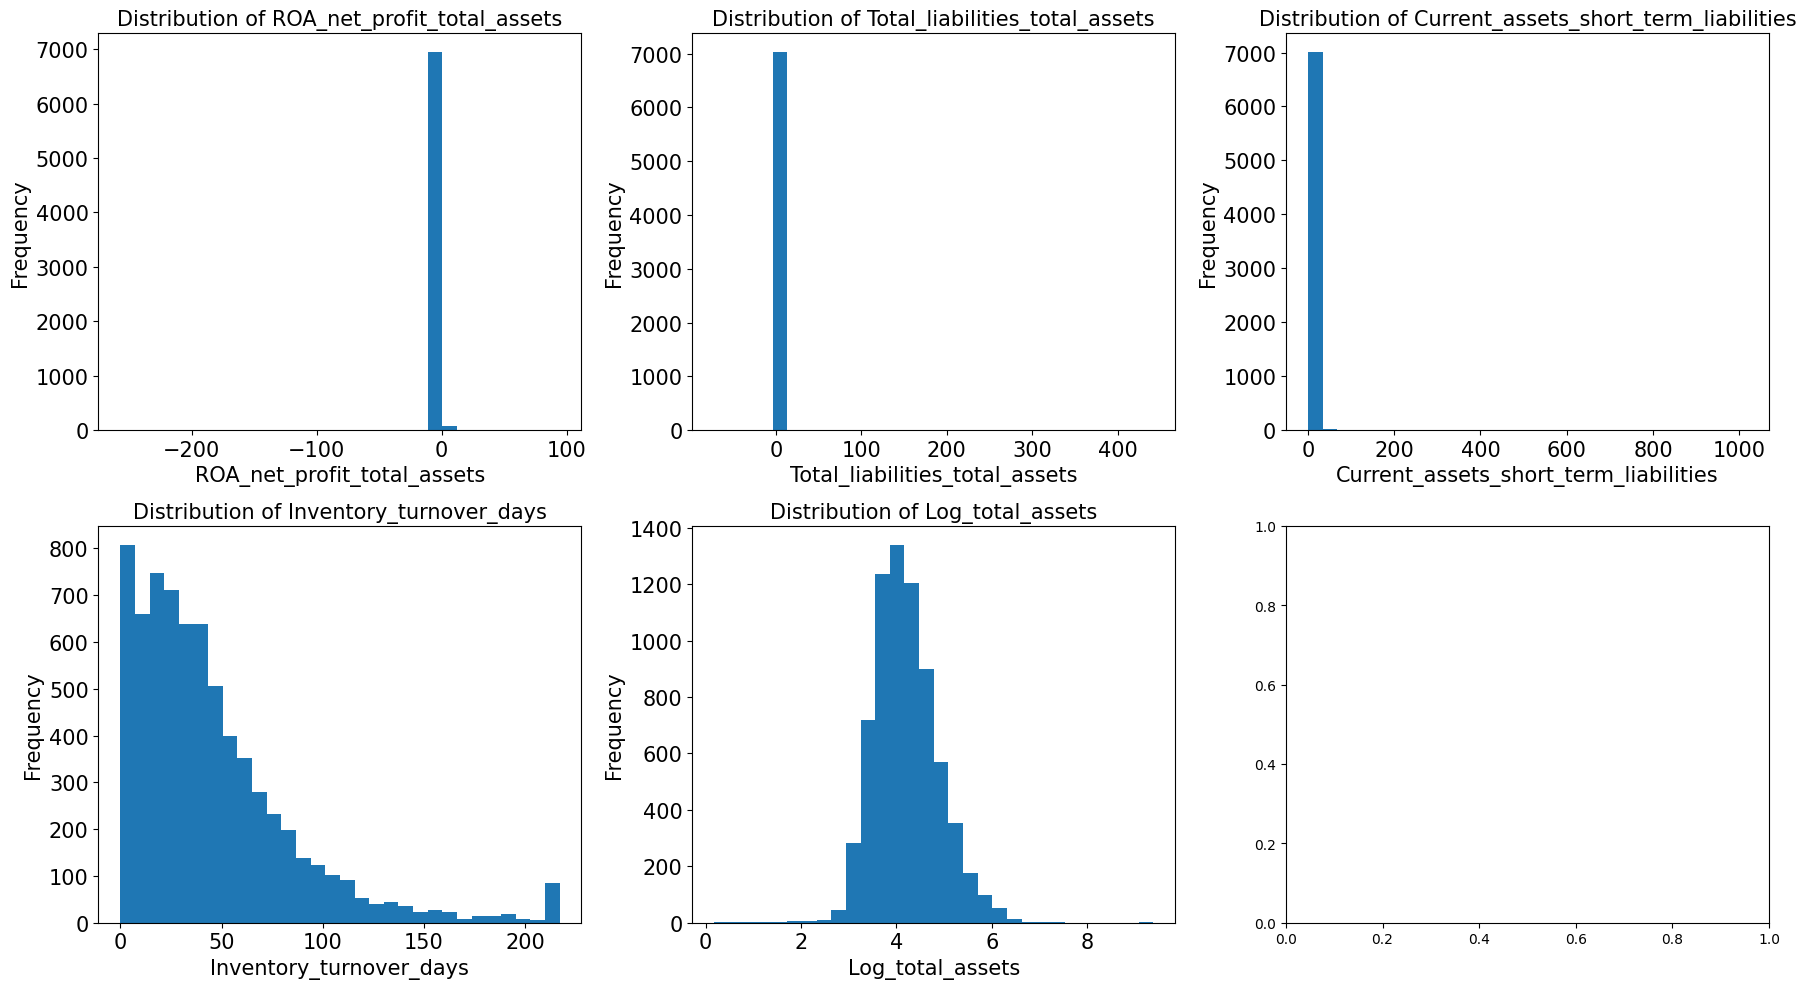

In [ ]:
# Selected representative ratios for visualization
vars_to_plot = [
    "ROA_net_profit_total_assets",          # Profitability
    "Total_liabilities_total_assets",       # Leverage
    "Current_assets_short_term_liabilities",# Liquidity
    "Inventory_turnover_days",              # Efficiency
    "Log_total_assets"                      # Size
]

ncols = 3
nvars = len(vars_to_plot)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_to_plot):
    ax = axes[i]

    ax.hist(df_imputed[col], bins=30)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.tick_params(axis="both", labelsize=15)

plt.tight_layout()
plt.show()


Profitability shows left-skewness which could be due to negative earnings among distressed firms, while leverage, liquidity, and efficiency measures tend to be right-skewed with few extreme values, and firm size (log-transformed total assets) follows an approximately normal distribution.

### **Bivariate Analysis: Bankrupt vs Non-Bankrupt**

This section compares the distributions of financial ratios across bankrupt and non-bankrupt firms, providing economic intuition for patterns later captured by the neural network.

Median differences are computed to identify variables with the largest separations, and boxplots are used to visualize the most discriminative ratios.

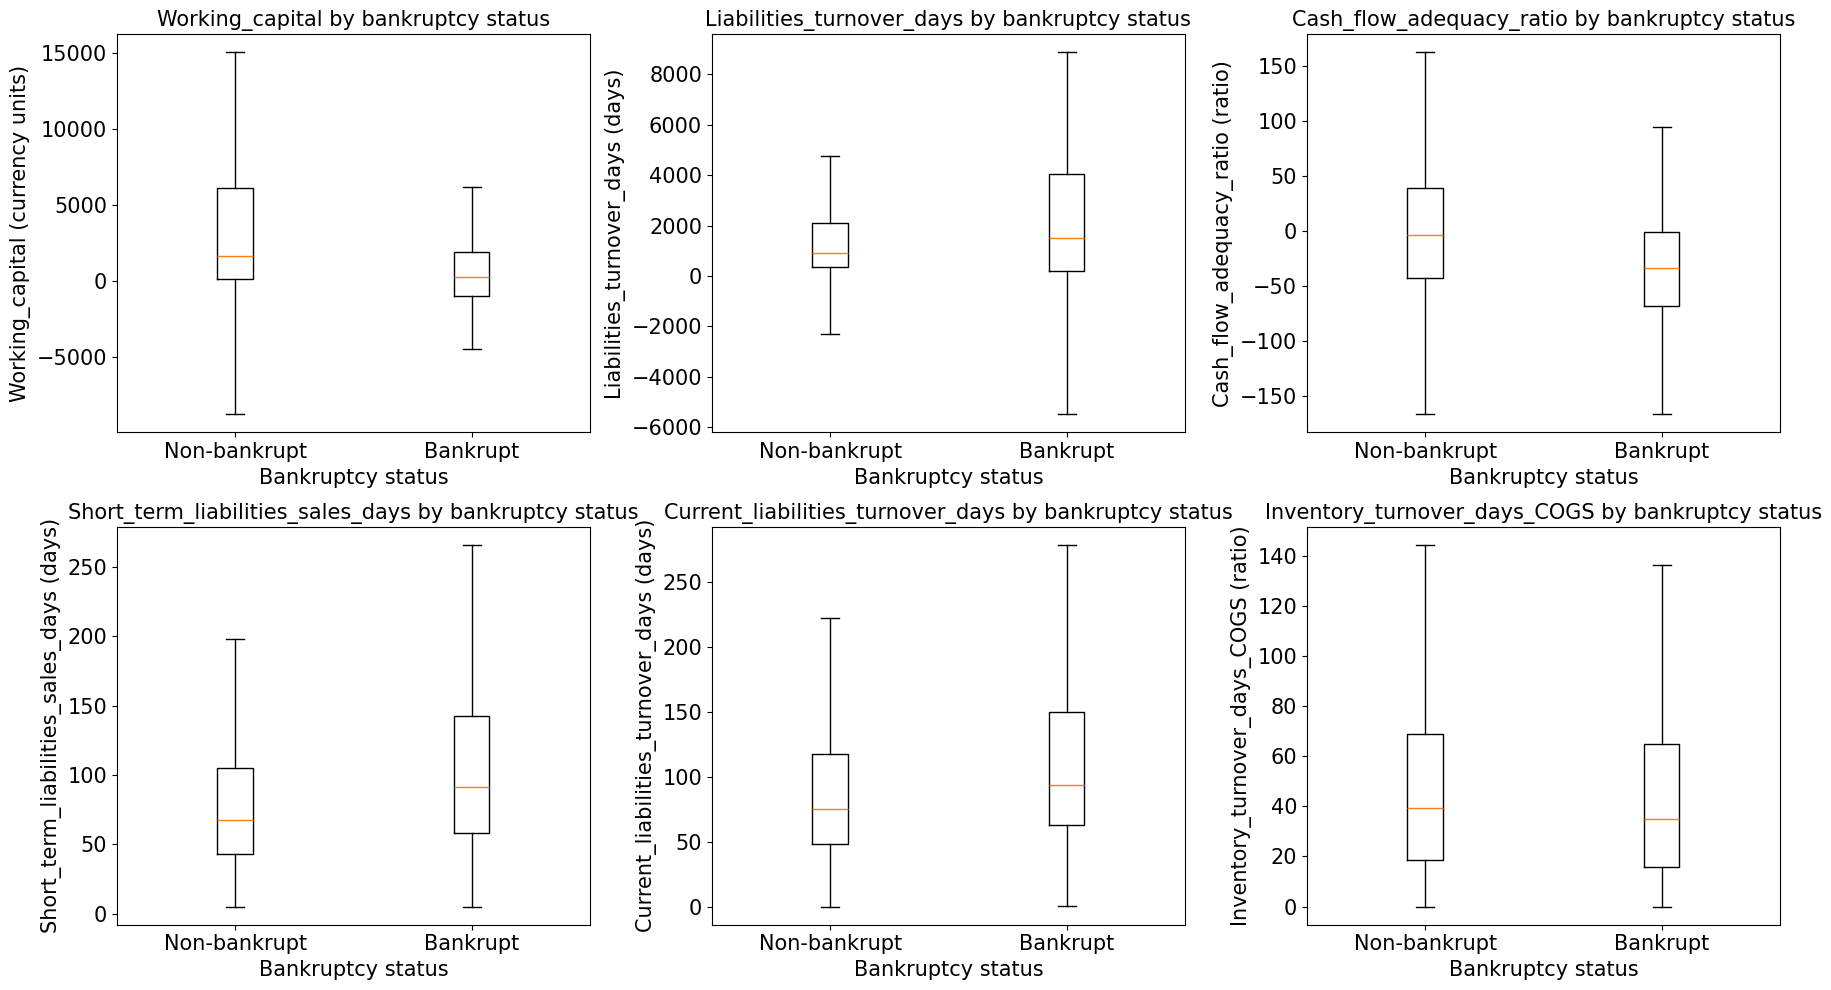

In [ ]:
# Define units for the y-axis
units = {
    # Monetary
    "Working_capital": "currency units",

    # Days-based
    "Liabilities_turnover_days": "days",
    "Current_liabilities_turnover_days": "days",
    "Short_term_liabilities_sales_days": "days",

    # Ratios (dimensionless)
    "Cash_flow_adequacy_ratio": "ratio",
    "Inventory_turnover_days_COGS": "ratio",
}

def y_label(var_name: str) -> str:
    """Return 'var (unit)'. If unit unknown, show '(unit not specified)' to be explicit."""
    unit = units.get(var_name, "unit not specified")
    return f"{var_name} ({unit})"

# Compute median differences between bankrupt and non-bankrupt firms
diff_table = []
feature_cols = [c for c in df_imputed.columns if c != "class"]

for col in feature_cols:
    med_0 = df_imputed.loc[df_imputed["class"] == 0, col].median()
    med_1 = df_imputed.loc[df_imputed["class"] == 1, col].median()
    diff_table.append((col, abs(med_0 - med_1)))

diff_df = (
    pd.DataFrame(diff_table, columns=["variable", "median_diff"])
    .sort_values("median_diff", ascending=False)
)

# Select top variables with largest differences (for visualization)
TOP_K = 6
vars_to_plot = diff_df.head(TOP_K)["variable"].tolist()

# Plot boxplots in a grid
ncols = 3
nvars = len(vars_to_plot)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_to_plot):
    ax = axes[i]

    data_0 = (
        df_imputed.loc[df_imputed["class"] == 0, col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )
    data_1 = (
        df_imputed.loc[df_imputed["class"] == 1, col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )

    ax.boxplot(
        [data_0, data_1],
        tick_labels=["Non-bankrupt", "Bankrupt"],
        showfliers=False
    )

    ax.set_title(f"{col} by bankruptcy status", fontsize=15)
    ax.set_ylabel(y_label(col), fontsize=15)
    ax.set_xlabel("Bankruptcy status", fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)

plt.tight_layout()
plt.show()

### **Correlation Analysis**

Linear correlations among financial ratios are examined to identify redundancy and strong associations.

While multicollinearity is not a limitation for neural network estimation, it is relevant for interpretability analysis.

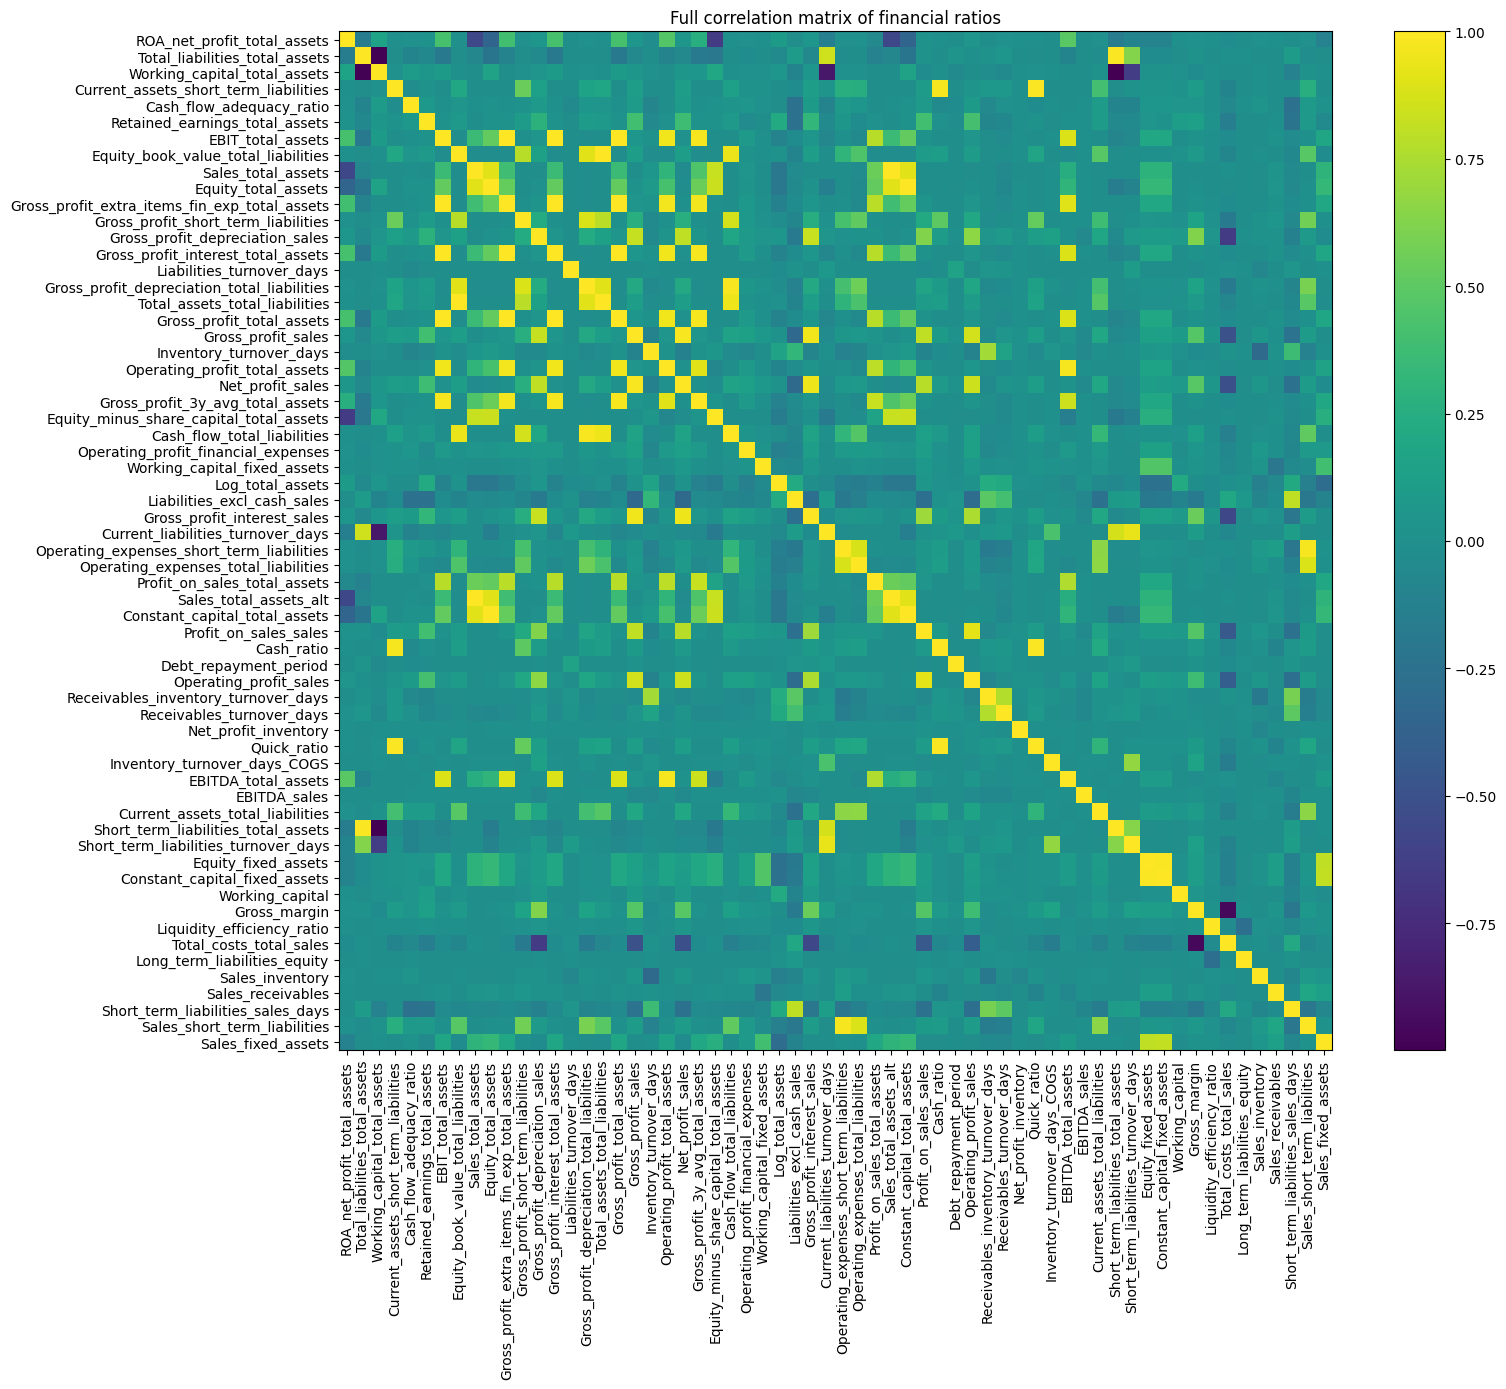

In [ ]:
# Create a correlation matrix to examine linear relationships between financial ratios
corr_full = df_imputed.drop(columns=["class"]).corr()

plt.figure(figsize=(16, 14))
plt.imshow(corr_full, aspect="auto")
plt.colorbar()

plt.xticks(
    ticks=range(len(corr_full.columns)),
    labels=corr_full.columns,
    rotation=90
)
plt.yticks(
    ticks=range(len(corr_full.columns)),
    labels=corr_full.columns
)

plt.title("Full correlation matrix of financial ratios")
plt.tight_layout()
plt.show()

# Color intensity reflects the strength and direction of linear correlation
# Yellow - strong positive correlation; blue - strong negative correlation

In [ ]:
# Convert the correlation matrix into a tabular format for clearer inspection
corr_table = (
    corr_full
    .where(np.triu(np.ones(corr_full.shape), k=1).astype(bool))  # remove duplicates & diagonal
    .stack()
    .reset_index()
)

corr_table.columns = ["Variable_1", "Variable_2", "Correlation"]

# Sort by absolute correlation
corr_table["abs_corr"] = corr_table["Correlation"].abs()
corr_table = corr_table.sort_values("abs_corr", ascending=False)

# Identify strongest positive and negative linear associations
top_corr = corr_table.head(15)

top_corr

,Variable_1,Variable_2,Correlation,abs_corr
718,Gross_profit_interest_total_assets,Gross_profit_total_assets,1.000000,1.000000
357,EBIT_total_assets,Gross_profit_interest_total_assets,1.000000,1.000000
361,EBIT_total_assets,Gross_profit_total_assets,1.000000,1.000000
538,Equity_total_assets,Constant_capital_total_assets,0.999990,0.999990
485,Sales_total_assets,Sales_total_assets_alt,0.999916,0.999916
166,Working_capital_total_assets,Short_term_liabilities_total_assets,-0.999136,0.999136
414,Equity_book_value_total_liabilities,Total_assets_total_liabilities,0.995457,0.995457
354,EBIT_total_assets,Gross_profit_extra_items_fin_exp_total_assets,0.994388,0.994388
571,Gross_profit_extra_items_fin_exp_total_assets,Gross_profit_total_assets,0.994388,0.994388
567,Gross_profit_extra_items_fin_exp_total_assets,Gross_profit_interest_total_assets,0.994388,0.994388


Strong correlations observed among profitability-related ratios.

### **Feature Scaling to [-1, 1]**

Feature scaling is applied to ensure numerical stability in neural network training and NN2Poly transformation.

Variables are scaled to the range [-1, 1] using Min-Max scaling.

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))

X = df_imputed.drop(columns=["class"])
y = df_imputed["class"]

X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

# Verify that all features are within the specified [-1, 1] range
X_scaled.describe().T[["min", "max"]].head()

,min,max
ROA_net_profit_total_assets,-1.0,1.0
Total_liabilities_total_assets,-1.0,1.0
Working_capital_total_assets,-1.0,1.0
Current_assets_short_term_liabilities,-1.0,1.0
Cash_flow_adequacy_ratio,-1.0,1.0


### **Save Processed Dataset**

The final dataset consists of scaled features and the binary target variable.

It is exported for use in the modeling notebook.

In [ ]:
# Final preprocessed dataset
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_final.head()

,ROA_net_profit_total_assets,Total_liabilities_total_assets,Working_capital_total_assets,Current_assets_short_term_liabilities,Cash_flow_adequacy_ratio,Retained_earnings_total_assets,EBIT_total_assets,Equity_book_value_total_liabilities,Sales_total_assets,Equity_total_assets,...,Gross_margin,Liquidity_efficiency_ratio,Total_costs_total_sales,Long_term_liabilities_equity,Sales_inventory,Sales_receivables,Short_term_liabilities_sales_days,Sales_short_term_liabilities,Sales_fixed_assets,class
0,0.464194,-0.717552,0.997266,-0.995977,0.194490,0.453902,-0.409915,-0.820859,-0.999412,-0.427220,...,-0.323242,0.428681,0.335252,0.465633,-0.978267,-0.999513,-0.760325,-0.991526,-0.969389,0
1,0.464243,-0.717083,0.997609,-0.996179,0.187669,-0.053936,-0.409888,-0.821279,-0.999123,-0.427229,...,-0.324459,0.428785,0.288464,0.465624,-0.992039,-0.999690,-0.683967,-0.993475,-0.740347,0
2,0.464468,-0.716320,0.996680,-0.996945,0.181480,-0.053936,-0.409730,-0.821980,-0.999325,-0.427481,...,-0.103369,0.430584,0.125883,0.468729,-0.989321,-0.999626,-0.600720,-0.994783,-0.978883,0
3,0.463516,-0.717833,0.997548,-0.995102,0.202102,0.142110,-0.410403,-0.820187,-0.999455,-0.427131,...,-0.448592,0.427527,0.462200,0.465624,-0.990664,-0.999658,-0.748645,-0.991896,-0.977421,0
4,0.464119,-0.716642,0.996510,-0.997237,0.179088,0.191082,-0.410109,-0.821737,-0.999404,-0.427373,...,-0.299461,0.429076,0.311166,0.466180,-0.984778,-0.999591,-0.622552,-0.994494,-0.967378,0


In [ ]:
df_final.to_csv("polish_preprocessed.csv", index=False)